# Assignment 2: Example Workflow

This notebook demonstrates the complete workflow for Assignment 2.

**Note**: This is a reference example. Your implementation may differ, but should follow these general steps.

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import seaborn as sns

# Import your implementations
import sys
import os
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path:
    sys.path.append(module_path)
from students import data_processing, regression, classification, evaluation

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## Step 2: Load and Preprocess Data

In [2]:
# Load data
df = data_processing.load_heart_disease_data('data/heart.csv')
print(f"Loaded data shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Missing values:\n{df.isnull().sum().sum()} total missing")

# Preprocess
df_clean = data_processing.preprocess_data(df)
print(f"\nPreprocessed data shape: {df_clean.shape}")
print(f"Data types: {df_clean.dtypes.unique()}")

Loaded data shape: (920, 15)
Columns: ['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
Missing values:
1759 total missing

Preprocessed data shape: (918, 30)
Data types: [dtype('float64')]


## Task 1: Linear Regression with ElasticNet

Regression data shapes: X=(918, 29), y=(918,)
Train shape: (734, 29), Test shape: (184, 29)

Training ElasticNet grid search...
Grid search results shape: (9, 4)
R² range: 0.019 to 0.615


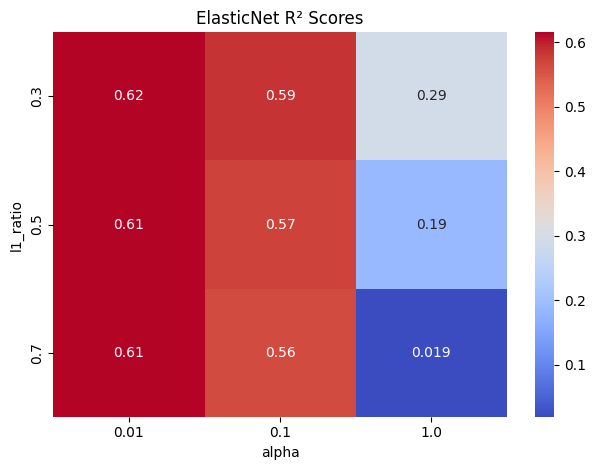


Best ElasticNet:
  l1_ratio: 0.3
  alpha: 0.01
  Test R²: 0.615


In [3]:
# Prepare regression data
X_reg, y_reg = data_processing.prepare_regression_data(df_clean, target='chol')
print(f"Regression data shapes: X={X_reg.shape}, y={y_reg.shape}")

# Split and scale
X_train_reg, X_test_reg, y_train_reg, y_test_reg, scaler_reg = data_processing.split_and_scale(
    X_reg, y_reg, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train_reg.shape}, Test shape: {X_test_reg.shape}")

# Train ElasticNet with grid search
print("\nTraining ElasticNet grid search...")
results = regression.train_elasticnet_grid(
    X_train_reg, y_train_reg,
    l1_ratios=[0.3, 0.5, 0.7],
    alphas=[0.01, 0.1, 1.0]
)
print(f"Grid search results shape: {results.shape}")
print(f"R² range: {results['r2_score'].min():.3f} to {results['r2_score'].max():.3f}")

# Create heatmap
fig = regression.create_r2_heatmap(
    results,
    [0.3, 0.5, 0.7],
    [0.01, 0.1, 1.0]
)
plt.title('ElasticNet R² Scores')
plt.tight_layout()
plt.show()

# Get best model
reg_best = regression.get_best_elasticnet_model(
    X_train_reg, y_train_reg, X_test_reg, y_test_reg,
    l1_ratios=[0.3, 0.5, 0.7],
    alphas=[0.01, 0.1, 1.0]
)
print(f"\nBest ElasticNet:")
print(f"  l1_ratio: {reg_best['best_l1_ratio']}")
print(f"  alpha: {reg_best['best_alpha']}")
print(f"  Test R²: {reg_best['test_r2']:.3f}")

## Tasks 2-3: Classification with Logistic Regression and k-NN

In [4]:
# Prepare classification data
X_clf, y_clf = data_processing.prepare_classification_data(df_clean, target='num')
print(f"Classification data shapes: X={X_clf.shape}, y={y_clf.shape}")
print(f"Class distribution: {np.bincount(y_clf.astype(int))}")

# Split and scale
X_train_clf, X_test_clf, y_train_clf, y_test_clf, scaler_clf = data_processing.split_and_scale(
    X_clf, y_clf, test_size=0.2, random_state=42
)
print(f"\nTrain shape: {X_train_clf.shape}, Test shape: {X_test_clf.shape}")

Classification data shapes: X=(918, 28), y=(918,)
Class distribution: [410 508]

Train shape: (734, 28), Test shape: (184, 28)


### Logistic Regression

Training Logistic Regression grid search...
Best parameters: {'C': 0.01, 'l1_ratio': 0, 'solver': 'lbfgs'}

Logistic Regression Test AUC: 0.888


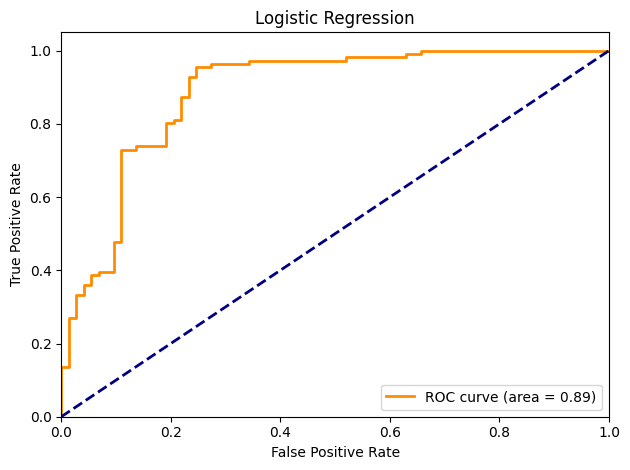

In [5]:
# Train logistic regression
print("Training Logistic Regression grid search...")
gs_lr = classification.train_logistic_regression_grid(X_train_clf, y_train_clf)
print(f"Best parameters: {gs_lr.best_params_}")

# Get best model
lr_best = classification.get_best_logistic_regression(
    X_train_clf, y_train_clf, X_test_clf, y_test_clf
)
print(f"\nLogistic Regression Test AUC: {lr_best['test_auc']:.3f}")

# Get probability predictions for curves
y_pred_lr = lr_best['model'].predict_proba(X_test_clf)[:, 1]

# Plot AUROC curve
fig_lr = evaluation.generate_auroc_curve(y_test_clf, y_pred_lr, label='Logistic Regression')
plt.tight_layout()
plt.show()

### k-NN Classification

Training k-NN grid search...
Best parameters: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}

k-NN Test AUC: 0.884


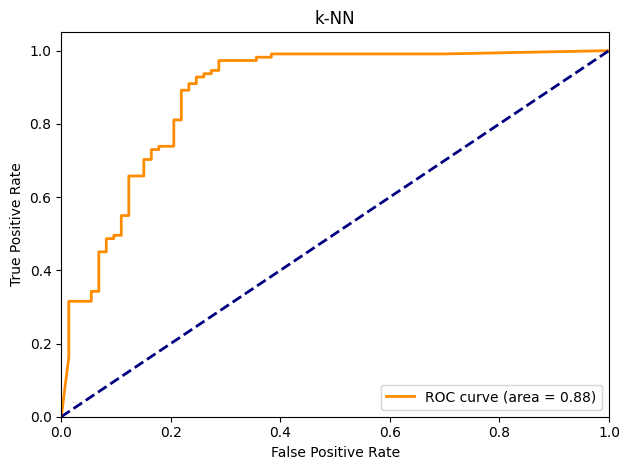

In [6]:
# Train k-NN
print("Training k-NN grid search...")
gs_knn = classification.train_knn_grid(X_train_clf, y_train_clf)
print(f"Best parameters: {gs_knn.best_params_}")

# Get best model
knn_best = classification.get_best_knn(
    X_train_clf, y_train_clf, X_test_clf, y_test_clf
)
print(f"\nk-NN Test AUC: {knn_best['test_auc']:.3f}")

# Get probability predictions
y_pred_knn = knn_best['model'].predict_proba(X_test_clf)[:, 1]

# Plot AUROC curve
fig_knn = evaluation.generate_auroc_curve(y_test_clf, y_pred_knn, label='k-NN')
plt.tight_layout()
plt.show()

## Task 4: Model Comparison

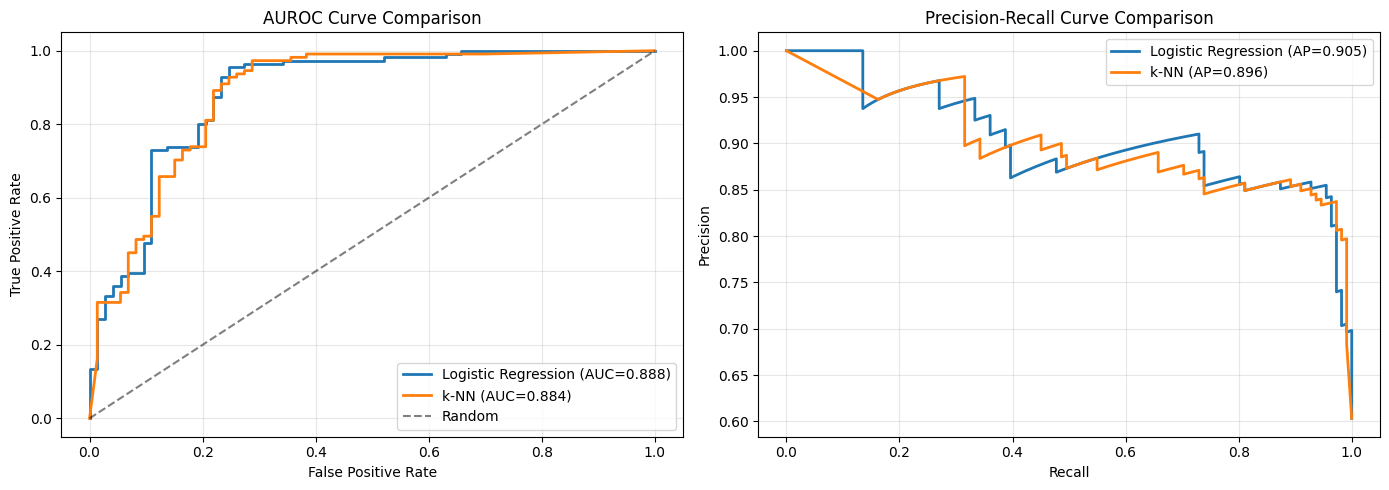


MODEL COMPARISON SUMMARY
Logistic Regression:
  AUROC: 0.888
  AUPRC: 0.905

k-NN:
  AUROC: 0.884
  AUPRC: 0.896

Better model: Logistic Regression


In [7]:
# Compare AUROC curves
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# AUROC comparison
fpr_lr, tpr_lr, _ = roc_curve(y_test_clf, y_pred_lr)
auc_lr = roc_auc_score(y_test_clf, y_pred_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test_clf, y_pred_knn)
auc_knn = roc_auc_score(y_test_clf, y_pred_knn)

axes[0].plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={auc_lr:.3f})', linewidth=2)
axes[0].plot(fpr_knn, tpr_knn, label=f'k-NN (AUC={auc_knn:.3f})', linewidth=2)
axes[0].plot([0, 1], [0, 1], 'k--', label='Random', alpha=0.5)
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('AUROC Curve Comparison')
axes[0].legend()
axes[0].grid(alpha=0.3)

# PR comparison
precision_lr, recall_lr, _ = precision_recall_curve(y_test_clf, y_pred_lr)
ap_lr = average_precision_score(y_test_clf, y_pred_lr)
precision_knn, recall_knn, _ = precision_recall_curve(y_test_clf, y_pred_knn)
ap_knn = average_precision_score(y_test_clf, y_pred_knn)

axes[1].plot(recall_lr, precision_lr, label=f'Logistic Regression (AP={ap_lr:.3f})', linewidth=2)
axes[1].plot(recall_knn, precision_knn, label=f'k-NN (AP={ap_knn:.3f})', linewidth=2)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve Comparison')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(f"Logistic Regression:")
print(f"  AUROC: {auc_lr:.3f}")
print(f"  AUPRC: {ap_lr:.3f}")
print(f"\nk-NN:")
print(f"  AUROC: {auc_knn:.3f}")
print(f"  AUPRC: {ap_knn:.3f}")
print(f"\nBetter model: {'Logistic Regression' if auc_lr > auc_knn else 'k-NN'}")
print("="*60)

## Summary

This notebook demonstrates:

1. **Data Loading & Preprocessing**: Loading CSV, handling missing values, encoding categorical variables
2. **ElasticNet Regression**: Grid search over l1_ratio and alpha, creating heatmap, evaluating test R²
3. **Logistic Regression**: GridSearchCV, hyperparameter tuning, AUROC/AUPRC evaluation
4. **k-NN Classification**: GridSearchCV, hyperparameter tuning, AUROC/AUPRC evaluation
5. **Model Comparison**: Side-by-side AUROC and PR curves

Your implementation should follow these same steps, though the specifics may differ.